In [155]:
import pandas as pd

data = pd.read_csv("./Data/obesity-classification.csv")

In [156]:
data.head()

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,Male,175,80,25.3,Normal Weight
1,2,30,Female,160,60,22.5,Normal Weight
2,3,35,Male,180,90,27.3,Overweight
3,4,40,Female,150,50,20.0,Underweight
4,5,45,Male,190,100,31.2,Obese


In [157]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
gender_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['Label'] = label_encoder.fit_transform(data['Label'])

print(data.head())

   ID  Age  Gender  Height  Weight   BMI  Label
0   1   25       1     175      80  25.3      0
1   2   30       0     160      60  22.5      0
2   3   35       1     180      90  27.3      2
3   4   40       0     150      50  20.0      3
4   5   45       1     190     100  31.2      1


In [158]:
from sklearn.preprocessing import StandardScaler

object = StandardScaler()
object.fit_transform(data)

array([[-1.73265960e+00, -8.76031772e-01,  9.63624112e-01,
         3.03699681e-01,  7.14052814e-01,  6.29376229e-01,
        -1.42393744e+00],
       [-1.70118319e+00, -6.72828526e-01, -1.03774904e+00,
        -2.36952498e-01,  1.77304310e-02,  2.58447810e-01,
        -1.42393744e+00],
       [-1.66970678e+00, -4.69625280e-01,  9.63624112e-01,
         4.83917074e-01,  1.06221401e+00,  8.94325099e-01,
         1.69692027e-01],
       [-1.63823038e+00, -2.66422034e-01, -1.03774904e+00,
        -5.97387285e-01, -3.30430760e-01, -7.27382778e-02,
         9.66506763e-01],
       [-1.60675397e+00, -6.32187876e-02,  9.63624112e-01,
         8.44351861e-01,  1.41037520e+00,  1.41097540e+00,
        -6.27122708e-01],
       [-1.57527757e+00,  1.39984458e-01, -1.03774904e+00,
        -9.57822071e-01, -6.78591952e-01, -5.09903914e-01,
         9.66506763e-01],
       [-1.54380116e+00,  3.43187704e-01,  9.63624112e-01,
         1.20478665e+00,  1.75853639e+00,  1.80839870e+00,
        -6.2712270

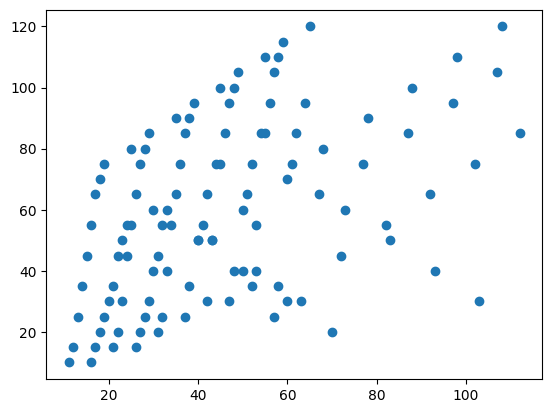

In [159]:
import matplotlib.pyplot as plt

plt.scatter(data['Age'], data['Weight'])

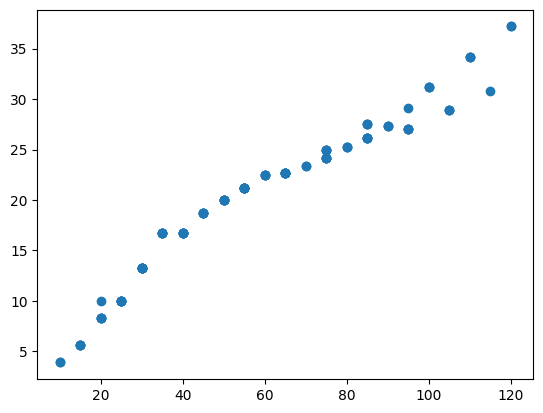

In [160]:
plt.scatter(data['Weight'], data['BMI'])

In [161]:
from sklearn.model_selection import train_test_split


# Not the data used in the bootstrap process, but used to train our model
X_train, X_test, y_train, y_test = train_test_split(data, data["Label"], test_size=0.3, random_state=32)

# SVC

In [162]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC 

In [163]:
svc_model = Pipeline([
    ('scaler', StandardScaler()),
    ('linear_svc', LinearSVC(C=0.001, loss='hinge'))
])

svc_model.fit(data, data["Label"])
y_pred = svc_model.predict(data)

### SVC Reports

In [164]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(data["Label"], y_pred))
print(confusion_matrix(data["Label"], y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       0.50      1.00      0.67        12
           2       1.00      0.35      0.52        20
           3       0.98      1.00      0.99        47

    accuracy                           0.88       108
   macro avg       0.87      0.84      0.79       108
weighted avg       0.94      0.88      0.87       108

[[29  0  0  0]
 [ 0 12  0  0]
 [ 0 12  7  1]
 [ 0  0  0 47]]


# Random Forest

In [165]:
from sklearn.ensemble import RandomForestClassifier

numberOfTreesInForest = 100
clf = RandomForestClassifier(n_estimators=numberOfTreesInForest)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [166]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00        12

    accuracy                           1.00        33
   macro avg       1.00      1.00      1.00        33
weighted avg       1.00      1.00      1.00        33

[[ 9  0  0  0]
 [ 0  4  0  0]
 [ 0  0  8  0]
 [ 0  0  0 12]]
